In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt

In [2]:
class Batch:
  quality = 0.5
  alpha = 1
  beta = 1
  good = 0
  

  def __init__(self, quality):
    self.quality = quality
  

  def sample_distribution(self):
    return np.random.beta(self.alpha, self.beta)
  
  
  def get_element(self):
    good = np.random.rand() < self.quality
    self.alpha = self.alpha + int(good)
    self.beta = self.beta + 1 - int(good)
    return good

In [3]:
class SwapLemon:
  batches = []
  systems = 0
  good = 0
  current_batch = 0
  name = 'SwapLemon'

  def set_batches(self, qualities, _):
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
  
  def get_element(self):
    if self.batches[self.current_batch].get_element():
        self.systems += 1
        self.good += 1
    else:
        self.systems += 1
        if self.current_batch < len(batches)-1:
            self.current_batch += 1
        else:
            self.current_batch = 0

In [5]:
class nBayes:
  batches = []
  systems = 0
  good = 0
  current_batch = 0
  epoch = 0
  training = 0
  in_training = True
  order =[]
  name = 'nBayes'


  def set_batches(self, qualities, training):
    self.batches = [Batch(quality) for quality in qualities]
    self.systems = 0
    self.good = 0
    self.training = len(batches)*training
    self.order = []


  def get_element(self):
    if self.in_training:  
        self.epoch +=1
        self.systems += 1
        if self.batches[self.current_batch].get_element():
            self.good += 1
            self.batches[self.current_batch].good += 1
            
        if self.current_batch < len(batches)-1:
            self.current_batch += 1

        else:
            self.current_batch = 0

        if self.epoch >= self.training:
            self.in_training = False
            self.epoch = 0
            order = []
            scores = [x.good for x in self.batches] 
            for i in range(len(scores)):
                for _ in range(len(batches)-i):
                    self.order.append(np.argmax(scores))
                    
                scores[np.argmax(scores)] = -1

    else:
        if self.epoch > len(self.order)-1:
            self.epoch = 0
        
        self.systems += 1
        if self.batches[self.order[self.epoch]].get_element():
            self.good += 1
        
        self.epoch += 1

In [6]:
class sBayes:
    batches = []
    systems = 0
    good = 0
    current_batch = 0
    epoch = 0
    training = 0
    in_training = True
    order =[]
    name = 'sBayes'


    def set_batches(self, qualities, training):
        self.batches = [Batch(quality) for quality in qualities]
        self.systems = 0
        self.good = 0
        self.training = len(batches)*training
        self.order = []


    def get_element(self):
        if self.in_training:  
            self.epoch +=1
            self.systems += 1
            if self.batches[self.current_batch].get_element():
                self.good += 1
                self.batches[self.current_batch].good += 1
                
            if self.current_batch < len(batches)-1:
                self.current_batch += 1

            else:
                self.current_batch = 0
    
            if self.epoch >= self.training:
                self.in_training = False
                self.epoch = 0
                scores = [x.good for x in self.batches]
                scores2 = scores.copy()
                last_count = 1
                for i in range(len(scores)):
                    if i == 0:
                        self.order.append(np.argmin(scores))
                        scores[np.argmin(scores)] = 1_000_000
                        
                    else:
                        si_minus_1 = scores2[self.order[-1]]
                        si = scores2[i]
                        if si_minus_1 == 0:
                            si_minus_1 = 1

                        last_count *= round(si/si_minus_1)
                        for a in range(last_count):
                            self.order.append(np.argmin(scores))

                        scores[np.argmin(scores)] = 1_000_000
                self.order.reverse()

        else:
            if self.epoch > len(self.order)-1:
                self.epoch = 0
            
            self.systems += 1
            if self.batches[self.order[self.epoch]].get_element():
                self.good += 1
            
            self.epoch += 1

In [7]:
class MyBayes:
    batches = []
    systems = 0
    good = 0
    current_batch = 0
    epoch = 0
    training = 0
    in_training = True
    order = []
    name = 'MyBayes'
    
    
    def set_batches(self, qualities, training):
        self.batches = [Batch(quality) for quality in qualities]
        self.systems = 0
        self.good = 0
        self.training = len(batches)*training
        self.order = []
    

    def get_element(self):
        if self.in_training:  
            self.epoch +=1
            self.systems += 1
            if self.batches[self.current_batch].get_element():
                self.systems += 1
                self.good += 1
            else:
                self.systems += 1
            if self.current_batch < len(batches)-1:
                self.current_batch += 1
            else:
                self.current_batch = 0

            if self.epoch >= self.training:
                self.in_training = False
                self.epoch = 0
                scores = [x.good for x in self.batches] 
                for _ in range(len(scores)):
                    self.order.append(np.argmax(scores))
                self.current_batch = self.order[0]
    
        else:
          self.systems+=1
          if self.batches[self.current_batch].get_element():
            self.good += 1
    
          else:
            self.current_batch = random.choice(self.order)

In [8]:
tries = 100 
epoch = 10000
learning = 50
batches = [0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25]
bayes_dict = {'SwapLemon': 0,'nBayes': 0, 'sBayes': 0, 'MyBayes': 0}
for _ in range(tries):
    swap_lemon = SwapLemon()
    n_bayes = nBayes()
    s_bayes = sBayes()
    my_bayes = MyBayes()
    bayes_lst = [swap_lemon, n_bayes, s_bayes, my_bayes]
    for bayes in bayes_lst:
        bayes.set_batches(batches, learning)
        for i in range(epoch):
            bayes.get_element()
        bayes_dict[bayes.name] += bayes.good/bayes.systems


for key in bayes_dict.keys():
    print(f'Average succes ratio for {key}: {bayes_dict[key]/tries:.2%}')

Average succes ratio for SwapLemon: 80.26%
Average succes ratio for nBayes: 70.94%
Average succes ratio for sBayes: 59.09%
Average succes ratio for MyBayes: 89.97%


In [11]:
tries = 3
epoch = 100
learning = 1
batches = [0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25]
bayes_dict = {'SwapLemon': 0,'nBayes': 0, 'sBayes': 0, 'MyBayes': 0}
for _ in range(tries):
    swap_lemon = SwapLemon()
    n_bayes = nBayes()
    s_bayes = sBayes()
    my_bayes = MyBayes()
    bayes_lst = [swap_lemon, n_bayes, s_bayes, my_bayes]
    for bayes in bayes_lst:
        bayes.set_batches(batches, learning)
        for i in range(epoch):
            bayes.get_element()
        bayes_dict[bayes.name] += bayes.good/bayes.systems


for key in bayes_dict.keys():
    print(f'Average succes ratio for {key}: {bayes_dict[key]/tries:.2%}')

Average succes ratio for SwapLemon: 78.67%
Average succes ratio for nBayes: 71.33%
Average succes ratio for sBayes: 69.67%
Average succes ratio for MyBayes: 84.57%


moja strategia opiera się w dużej mierze na strategii SkipLemon dodałem to niej metode uczenia tak jak w przypadku nBayesa i sBayesa. Gdy producent nie jest dobry zostaje wybrany losowy i proces uczenie jest kontynuowany. Moja klasa uczy sie zaskakująco szybko w 3 próbach i skaląuczenie ustawioną na 1. Prawdopodobnie zawdzięcza to temu ze szybko ten najlepszy jest wybierany a pozostałe skipowane

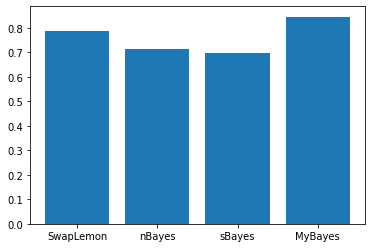

In [14]:
for key in bayes_dict.keys():
    bayes_dict[key] = bayes_dict[key]/tries

plt.bar(*zip(*bayes_dict.items()))
plt.show()